# Data Preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_rows',1000)

In [2]:
df = pd.read_csv('fico.csv')
df

,acct_id,FICO
0,1,768
1,2,850
2,3,677
3,4,843
4,5,796
...,...,...
100008,99996,NaN
100009,99997,NaN
100010,99998,NaN
100011,99999,SSS


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100013 entries, 0 to 100012
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   acct_id  100013 non-null  int64 
 1   FICO     70398 non-null   object
dtypes: int64(1), object(1)
memory usage: 1.5+ MB


# Data Preprocessing

In [4]:
df.fillna('Missing',inplace=True)
df['FICO'].value_counts()

Missing    29615
850        12061
836          865
845          836
828          747
841          668
820          637
839          625
842          608
838          599
834          573
837          572
830          571
827          570
835          564
844          564
840          561
831          559
811          554
849          546
833          539
843          534
832          530
848          528
847          526
829          521
825          503
793          497
824          496
822          486
823          481
802          481
814          480
821          474
818          469
819          467
816          457
785          451
809          444
826          441
817          437
808          421
813          420
767          419
812          408
807          408
777          407
815          405
803          404
806          402
797          392
801          391
805          386
799          371
804          369
788          368
796          364
759          358
792          3

In [5]:
df['FICO'].replace(to_replace=['AA','SSS'],value='Missing',inplace=True)

In [6]:
df['FICO'].value_counts()

Missing    29617
850        12061
836          865
845          836
828          747
841          668
820          637
839          625
842          608
838          599
834          573
837          572
830          571
827          570
835          564
844          564
840          561
831          559
811          554
849          546
833          539
843          534
832          530
848          528
847          526
829          521
825          503
793          497
824          496
822          486
823          481
802          481
814          480
821          474
818          469
819          467
816          457
785          451
809          444
826          441
817          437
808          421
813          420
767          419
812          408
807          408
777          407
815          405
803          404
806          402
797          392
801          391
805          386
799          371
804          369
788          368
796          364
759          358
792          3

In [7]:
df['acct_id'].value_counts()
df.shape

(100013, 2)

In [8]:
df.drop_duplicates(inplace=True)
df.shape

(100000, 2)

In [9]:
df = df[df["FICO"].str.contains("Missing") == False]
df

,acct_id,FICO
0,1,768
1,2,850
2,3,677
3,4,843
4,5,796
...,...,...
99998,99986,836
99999,99987,850
100001,99989,850
100002,99990,830


# Categorizing Data

In [10]:
# According to my google search there are 5 basic segments for 'FICO' Scores

# 800 - 850 => 'Exceptional'
# 740 - 799 => 'Very_Good'
# 670 - 739 => 'Good'
# 580 - 669 => 'Fair'
# 300 - 579 => 'Poor'

In [11]:
df['FICO'] = df['FICO'].astype(int)

bins = [300, 580, 670, 740, 800, np.inf]
names = ['Poor','Fair','Good','Very_Good','Exceptional']
        
df['category'] = pd.cut(df['FICO'], bins, labels=names)

C:\Users\ASUS\AppData\Local\Temp/ipykernel_2936/2434660854.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FICO'] = df['FICO'].astype(int)
C:\Users\ASUS\AppData\Local\Temp/ipykernel_2936/2434660854.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['category'] = pd.cut(df['FICO'], bins, labels=names)


In [12]:
df

,acct_id,FICO,category
0,1,768,Very_Good
1,2,850,Exceptional
2,3,677,Good
3,4,843,Exceptional
4,5,796,Very_Good
...,...,...,...
99998,99986,836,Exceptional
99999,99987,850,Exceptional
100001,99989,850,Exceptional
100002,99990,830,Exceptional


# Data Visualization

In [13]:
# Using basic percentage formula to calculate % of each of the category

df['category'].value_counts()/df['category'].size*100

Exceptional    51.974825
Very_Good      26.167136
Good           15.794334
Fair            4.979683
Poor            1.084022
Name: category, dtype: float64

(array([18418.,     0., 36583.,     0.,     0., 11117.,     0.,  3505.,
            0.,   763.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

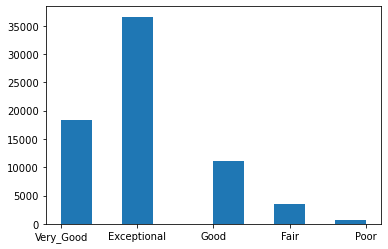

In [14]:
# Now using a histogram to see data in action

plt.hist(df.category)

In [15]:
# Finding average 'FICO' Score

df['FICO'].mean()

785.7470661779331

In [16]:
# As we can see more than 50% of people have an Exceptional score and very few people have a poor score
# According to google in America an average FICO score is around 711 and in our dataset average score is 785.74
# So this data does not reflect real world 

In [17]:
reg = pd.read_csv('region.csv')
reg

,acct_id,region
0,1,New York
1,2,Dallas
2,3,Los Angeles
3,4,Chicago
4,5,Philadelphia
...,...,...
100168,99996,Chicago
100169,99997,New York
100170,99998,San Diego
100171,99999,Chicago


In [18]:
temp = pd.merge(df,reg,on='acct_id')
temp

,acct_id,FICO,category,region
0,1,768,Very_Good,New York
1,2,850,Exceptional,Dallas
2,3,677,Good,Los Angeles
3,4,843,Exceptional,Chicago
4,5,796,Very_Good,Philadelphia
...,...,...,...,...
70554,99986,836,Exceptional,Phoenix
70555,99987,850,Exceptional,Los Angeles
70556,99989,850,Exceptional,Los Angeles
70557,99990,830,Exceptional,Chicago


In [19]:
temp['region'].value_counts()

Dallas          7273
San Antonio     7189
Charlotte       7091
New York        7071
Houston         7065
Los Angeles     7031
Phoenix         7014
Philadelphia    6951
San Diego       6946
Chicago         6928
Name: region, dtype: int64

In [20]:
mean_score = temp.groupby('region', as_index=False)['FICO'].mean()
mean_score.sort_values(by='FICO')

,region,FICO
2,Dallas,782.102021
9,San Diego,784.076447
8,San Antonio,784.508277
5,New York,785.065903
0,Charlotte,785.154280
1,Chicago,785.643043
4,Los Angeles,785.689233
6,Philadelphia,785.773845
3,Houston,786.005803
7,Phoenix,788.170231


In [21]:
desired_table = mean_score.loc[[3,2]]
desired_table

,region,FICO
3,Houston,786.005803
2,Dallas,782.102021


In [22]:
# Hence as shown in above dataframe 
# Houston has the 2nd Greatest FICO score
# Dallas has the lowest FICO score